In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('D:/Banking/Dataset/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [3]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [18]:
classifier = Sequential()

In [19]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(rate = 0.1))

In [20]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

In [21]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [22]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
8000/8000 [==============================] - 8s 941us/step - loss: 0.6534 - acc: 0.7884
Epoch 2/20
8000/8000 [==============================] - 6s 787us/step - loss: 0.5265 - acc: 0.7960
Epoch 3/20
8000/8000 [==============================] - 5s 571us/step - loss: 0.5182 - acc: 0.7960
Epoch 4/20
8000/8000 [==============================] - 3s 414us/step - loss: 0.5110 - acc: 0.7960
Epoch 5/20
8000/8000 [==============================] - 3s 393us/step - loss: 0.5052 - acc: 0.7960
Epoch 6/20
8000/8000 [==============================] - 3s 407us/step - loss: 0.5030 - acc: 0.7960
Epoch 7/20
8000/8000 [==============================] - 3s 411us/step - loss: 0.5041 - acc: 0.7960
Epoch 8/20
8000/8000 [==============================] - 3s 411us/step - loss: 0.5032 - acc: 0.7960
Epoch 9/20
8000/8000 [==============================] - 3s 415us/step - loss: 0.5036 - acc: 0.7960
Epoch 10/20
8000/8000 [==============================] - 3s 431us/step - loss: 0.5034 - acc: 0.7960
Epoch 11/

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))

[[1595    0]
 [ 405    0]]


In [26]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89      1595
          1       0.00      0.00      0.00       405

avg / total       0.64      0.80      0.71      2000



c:\users\11200745\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
print(accuracy_score(y_test, y_pred))

0.7975


# Import Libraries

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression

In [29]:
print("Logistic Regression")
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

Logistic Regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predictions_lr = logmodel.predict(X_test)

In [31]:
print(classification_report(y_test,predictions_lr))

             precision    recall  f1-score   support

          0       0.80      0.97      0.88      1595
          1       0.36      0.07      0.12       405

avg / total       0.71      0.79      0.72      2000



In [32]:
print(confusion_matrix(y_test,predictions_lr))

[[1545   50]
 [ 377   28]]


In [33]:
print(accuracy_score(y_test,predictions_lr))

0.7865


# SVM

In [34]:
svm1 = svm.SVC()
svm1.fit(X_train,y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
predictions_svm = svm1.predict(X_test)

In [36]:
print(classification_report(y_test,predictions_svm))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89      1595
          1       0.00      0.00      0.00       405

avg / total       0.64      0.80      0.71      2000



c:\users\11200745\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
print(confusion_matrix(y_test,predictions_svm))

[[1595    0]
 [ 405    0]]


In [38]:
print(accuracy_score(y_test,predictions_svm))

0.7975


# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')

In [44]:
print("KNN")
predictions_knn = knn.predict(X_test)

KNN


In [45]:
print(classification_report(y_test,predictions_knn))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89      1595
          1       0.00      0.00      0.00       405

avg / total       0.64      0.80      0.71      2000



In [46]:
print(confusion_matrix(y_test,predictions_knn))

[[1592    3]
 [ 405    0]]


In [47]:
print(accuracy_score(y_test,predictions_knn))

0.796


# Choosing a K-Value

In [48]:
error_rate = []


# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

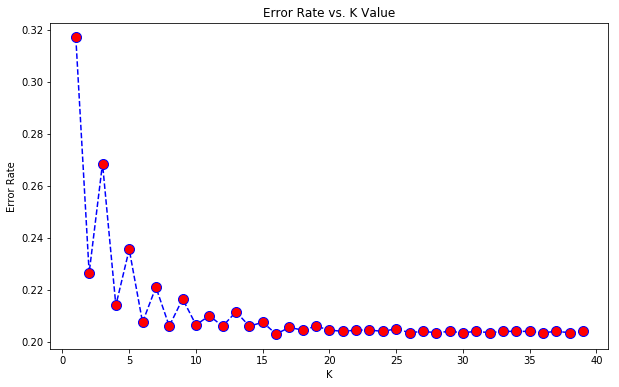

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#plt.savefig(your_local_path+"kValue.png")

In [51]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=1


[[1287  308]
 [ 326   79]]


             precision    recall  f1-score   support

          0       0.80      0.81      0.80      1595
          1       0.20      0.20      0.20       405

avg / total       0.68      0.68      0.68      2000



0.683


In [52]:
# NOW WITH K=10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
predictions_knn = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,predictions_knn))
print('\n')
print(classification_report(y_test,predictions_knn))
print('\n')
print(accuracy_score(y_test,predictions_knn))

WITH K=10


[[1578   17]
 [ 396    9]]


             precision    recall  f1-score   support

          0       0.80      0.99      0.88      1595
          1       0.35      0.02      0.04       405

avg / total       0.71      0.79      0.71      2000



0.7935


# Decision Trees

In [37]:
print("Decision Trees")
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_leaf_nodes=10)
dtree.fit(X_train,y_train)

Decision Trees


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
predictions_dtree = dtree.predict(X_test)

In [39]:
print(classification_report(y_test,predictions_dtree))

             precision    recall  f1-score   support

          0       0.88      0.95      0.92      1595
          1       0.73      0.50      0.59       405

avg / total       0.85      0.86      0.85      2000



In [40]:
print(confusion_matrix(y_test,predictions_dtree))

[[1520   75]
 [ 204  201]]


In [41]:
print(accuracy_score(y_test,predictions_dtree))

0.8605


# Tree Visualization

In [22]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import pydotplus


df= pd.DataFrame(X_train)
#df = dataset[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
features = list(df.columns)
features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

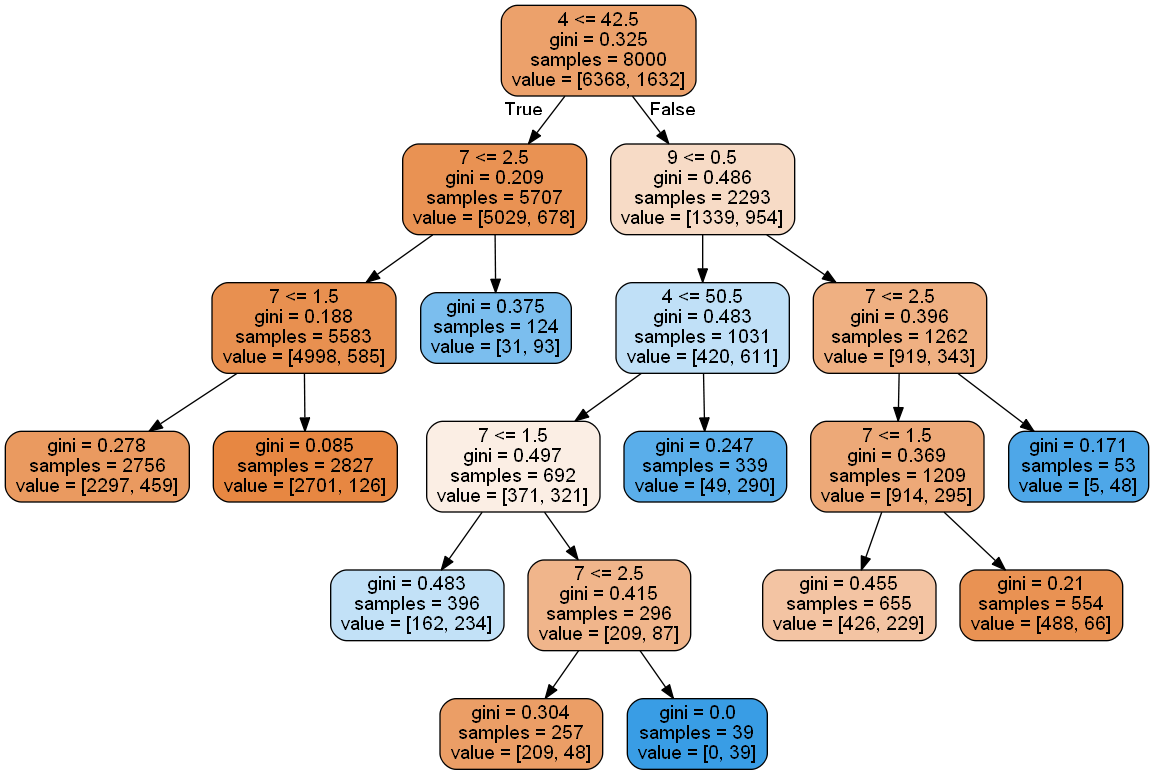

In [25]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#graph.write_pdf("D:/tree.pdf")

# Random Forest

In [27]:
print("Random Forests")
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

Random Forests


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
predictions_rf = rfc.predict(X_test)

In [29]:
print(classification_report(y_test,predictions_rf))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92      1595
          1       0.75      0.52      0.62       405

avg / total       0.86      0.87      0.86      2000



In [30]:
print(confusion_matrix(y_test,predictions_rf))

[[1525   70]
 [ 193  212]]


In [31]:
print(accuracy_score(y_test,predictions_rf))

0.8685


# Guassian Naive Bayes

In [42]:
print("Guassian Naive Bayes")
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
predictions_nb = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != predictions_nb).sum()))

Guassian Naive Bayes
Number of mislabeled points out of a total 2000 points : 430


In [43]:
print(classification_report(y_test,predictions_nb))

             precision    recall  f1-score   support

          0       0.81      0.96      0.88      1595
          1       0.37      0.09      0.14       405

avg / total       0.72      0.79      0.73      2000



In [44]:
print(confusion_matrix(y_test,predictions_nb))

[[1535   60]
 [ 370   35]]


In [45]:
print(accuracy_score(y_test,predictions_nb))

0.785
